<a href="https://colab.research.google.com/github/alex-smith-uwec/CS491/blob/main/SentenceExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
my_path="/content/drive/MyDrive/CS491/Data/"

Some pre-processing: download novel from Gutenberg, then remove preamble and postamble.

In [3]:
title = 'The Golden Bowl'
tit='Bowl'
author = 'Henry James'
url = 'https://www.gutenberg.org/cache/epub/4264/pg4264.txt'
path = my_path


In [4]:
import os

In [5]:
# Check if the file is stored locally
filename = my_path+ title
if os.path.isfile(filename) and os.stat(filename).st_size != 0:
        print("{title} file already exists".format(title=title))
        with open(filename, 'r') as f:
            raw = f.read()

else:
    print("{title} file does not already exist. Grabbing from Project Gutenberg".format(title=title))
    response = request.urlopen(url)
    raw = response.read().decode('utf-8-sig')
    print("Saving {title} file".format(title=title))
    with open(filename, 'w') as outfile:
        outfile.write(raw)

The Golden Bowl file already exists


In the file browser to the left, open the book. The text should (might?) appear in a cell on the right. Delete preamble and postamble, then save.

In [6]:
# first, remove unwanted new line and tab characters from the text
for char in ["\n", "\r", "\d", "\t"]:
   raw = raw.replace(char, " ")

with open(filename, 'w') as outfile:
    outfile.write(raw)

In [8]:
print(f"first characters are: {raw[:50]}")
print(f"last characters are: {raw[-50:]}")

first characters are:        The Prince had always liked his London, whe
last characters are: d of them, she buried her own in his breast.      


# Onwards to sentences

In [9]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
with open(my_path+title, 'r') as file:
    all_sentences=sent_tokenize(file.read())#.lower())

In [11]:
len(all_sentences)

6953

In [12]:
import random

In [14]:
random.choice(all_sentences)

'There was a particular reason, which he hadn’t mentioned, and which had made him consider and repent.'

In [15]:
all_sentences[0:2]

['       The Prince had always liked his London, when it had come to him; he was one of the modern Romans who find by the Thames a more convincing image of the truth of the ancient state than any they have left by the Tiber.',
 'Brought up on the legend of the City to which the world paid tribute, he recognised in the present London much more than in contemporary Rome the real dimensions of such a case.']

In [67]:
temp=random.choice(all_sentences)
print(temp)

This, for him, is what it was to have married Charlotte.


# Tagging and parsing
We experiment with average_perceptron_tagger, pos_tag, grammar, RegexpParser

In [68]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [75]:
# Menu of sentences to be tagged
# sentence = temp #see above, from novel.
# sentence="See Spot run."
sentence="The quick brown fox jumped over the lazy dog."
# sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
# sentence='They can fish'#Interesting to see how this will get parsed!
print(sentence)

The quick brown fox jumped over the lazy dog.


In [76]:
# Tokenizing and tagging
tokens = nltk.word_tokenize(sentence)
tagged = nltk.pos_tag(tokens)

tagged

[('The', 'DT'),
 ('quick', 'JJ'),
 ('brown', 'NN'),
 ('fox', 'NN'),
 ('jumped', 'VBD'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('lazy', 'JJ'),
 ('dog', 'NN'),
 ('.', '.')]

See [Penntree bank info](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) for part of speech tags.



In [ ]:
##This will show details about POS tags
# nltk.download('tagsets')
# nltk.help.upenn_tagset()

In [77]:
# Some possible grammars to create parse tree

# grammar=" " #empty grammar
# grammar = "NP: {<JJ><NN>}"
# grammar = "NP: {<DT>?<JJ>*<NN>}"

grammar = """
    NP: {<DT>?<JJ>*<NN>}                      # Noun Phrase
    VP: {<VB.*><NP|PP>+}                      # Verb Phrase
    PP: {<IN><NP>}                            # Prepositional Phrase
    ADJP: {<RB>*<JJ>}                         # Adjective Phrase
    CS: {<NP><VP><CC><NP><VP>}                # Compound Sentence
    NER: {<NNP>+}                             # Named Entity Recognition
"""


In [78]:
# Create tree
parser = nltk.RegexpParser(grammar)
tree = parser.parse(tagged)
print(tree)

(S
  (NP The/DT quick/JJ brown/NN)
  (NP fox/NN)
  jumped/VBD
  (PP over/IN (NP the/DT lazy/JJ dog/NN))
  ./.)


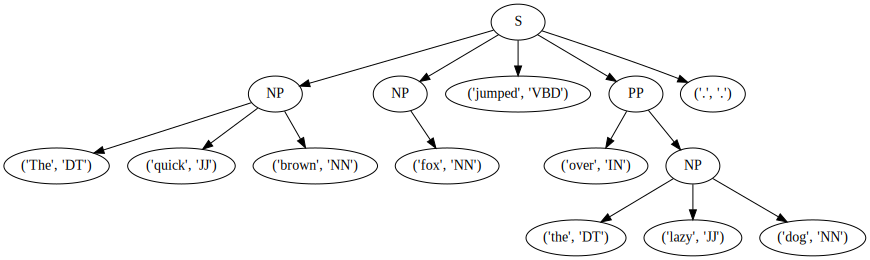

In [79]:
import graphviz

# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display
dot_source = to_graphviz(tree)
display(dot_source)
